In [233]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
# import sys
# sys.path.append('../')

In [235]:
from IPython.display import clear_output
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [236]:
# schedule = pd.DataFrame(columns=pd.MultiIndex.from_product([range(3), ['s','e']]), index=range(6))

In [237]:
from pyosrd.schedules import Schedule
schedule = Schedule(6,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN

In [238]:
schedule.df.at[0, 0] =  [0, 1]
schedule.df.at[2, 0] =  [1, 2]
schedule.df.at[3, 0] =  [2, 3]
schedule.df.at[4, 0] =  [3, 4]
schedule.df.at[6, 0] =  [4, 5]

schedule.df.at[1, 1] =  [1, 2]
schedule.df.at[2, 1] =  [2, 3]
schedule.df.at[3, 1] =  [3, 4]
schedule.df.at[4, 1] =  [4, 5]
schedule.df.at[5, 1] =  [5, 6]

schedule.df.at[0, 2] =  [2, 3]
schedule.df.at[2, 2] =  [3, 4]
schedule.df.at[3, 2] =  [4, 5]
schedule.df.at[4, 2] =  [5, 6]
schedule.df.at[6, 2] =  [6, 7]

schedule._df.index = 'BLOCK' + schedule._df.index.astype(str)

In [239]:
schedule.df

0         1         2     
          s    e    s    e    s    e
BLOCK0    0    1  NaN  NaN    2    3
BLOCK1  NaN  NaN    1    2  NaN  NaN
BLOCK2    1    2    2    3    3    4
BLOCK3    2    3    3    4    4    5
BLOCK4    3    4    4    5    5    6
BLOCK5  NaN  NaN    5    6  NaN  NaN
BLOCK6    4    5  NaN  NaN    6    7

In [240]:
schedule.lengths

,0,1,2
BLOCK0,1.0,NaN,1.0
BLOCK1,NaN,1.0,NaN
BLOCK2,1.0,1.0,1.0
BLOCK3,1.0,1.0,1.0
BLOCK4,1.0,1.0,1.0
BLOCK5,NaN,1.0,NaN
BLOCK6,1.0,NaN,1.0


In [241]:
schedule.draw_graph()

<Axes: xlabel='Time', ylabel='Track sections'>

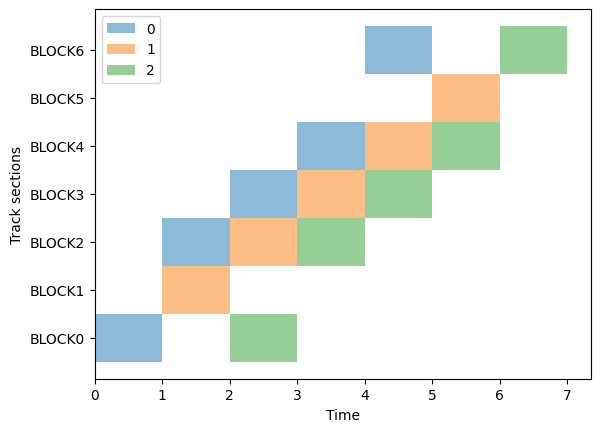

In [242]:
schedule.plot()

In [243]:
schedule.is_a_point_switch(1,2,'BLOCK2')
schedule.is_just_after_a_point_switch(1,2,'BLOCK3')

True

<Axes: xlabel='Time', ylabel='Track sections'>

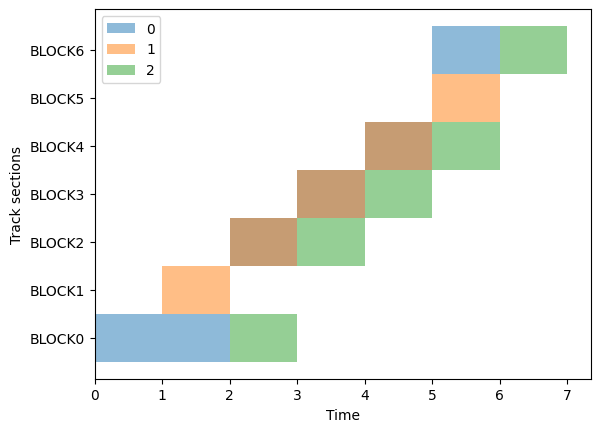

In [244]:
schedule
# add_delay(schedule, 0, 0, 1)
schedule.add_delay( 0, 'BLOCK0', 1.).plot()
# add_delay(schedule, 0, 3, 3)

In [245]:
%%time
schedule.num_blocks
schedule.num_trains
schedule.trains

CPU times: user 28 µs, sys: 18 µs, total: 46 µs
Wall time: 47.2 µs


[0, 1, 2]

In [246]:
m = schedule.add_delay(0, 'BLOCK0', 1)
m.conflicts(0)

,1,2
BLOCK0,NaN,NaN
BLOCK1,NaN,NaN
BLOCK2,2.0,NaN
BLOCK3,3.0,NaN
BLOCK4,4.0,NaN
BLOCK5,NaN,NaN
BLOCK6,NaN,NaN


(True, ('BLOCK2', 1))

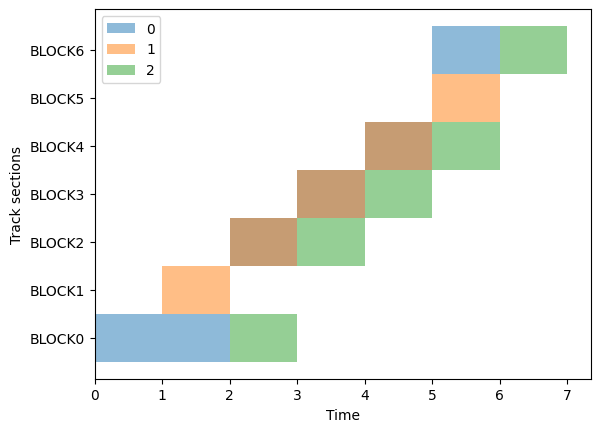

In [247]:
m.plot()
m.has_conflicts(0), m.first_conflict(0)

In [248]:
train1, train2, train3 = 0, 1, 2

<Axes: xlabel='Time', ylabel='Track sections'>

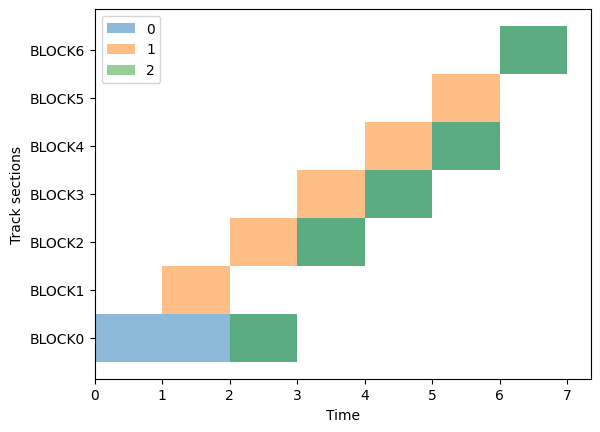

In [249]:
m1 = m.shift_train_after(train1, train2, 'BLOCK2')
m1.plot()

3.0

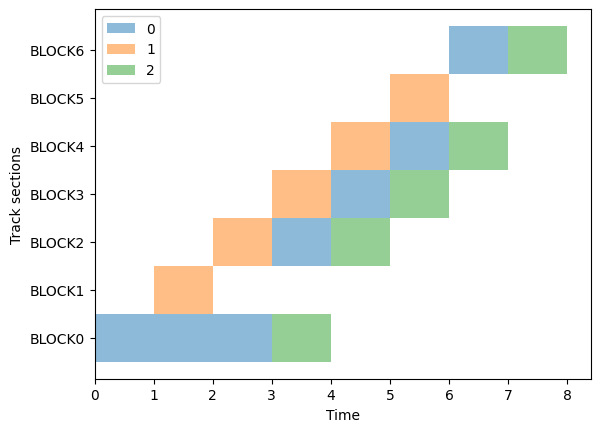

In [250]:
mprime1 = m1.shift_train_after(train3, train1, 'BLOCK0')
mprime1.plot()
mprime1.total_delay_at_stations(schedule, [4, 5])

<Axes: xlabel='Time', ylabel='Track sections'>

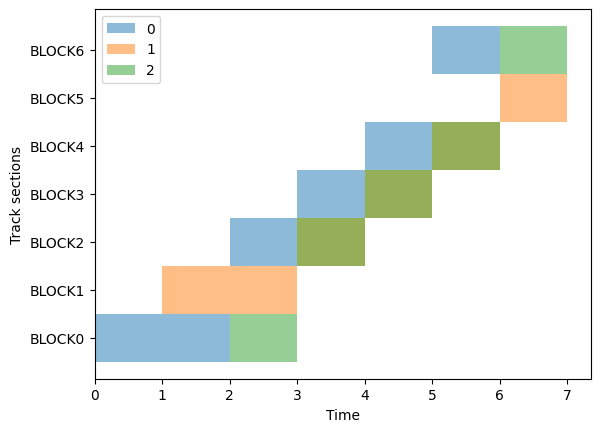

In [251]:
m2=m.shift_train_after(train2, train1, 'BLOCK2')
m2.plot()

3.0

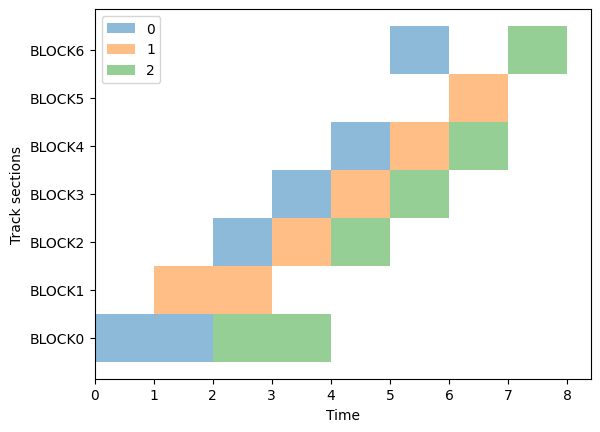

In [252]:
m3=m2.shift_train_after(train3, train2, 'BLOCK2')
m3.plot()
m3.total_delay_at_stations(schedule, ['BLOCK5','BLOCK6'])

3.0

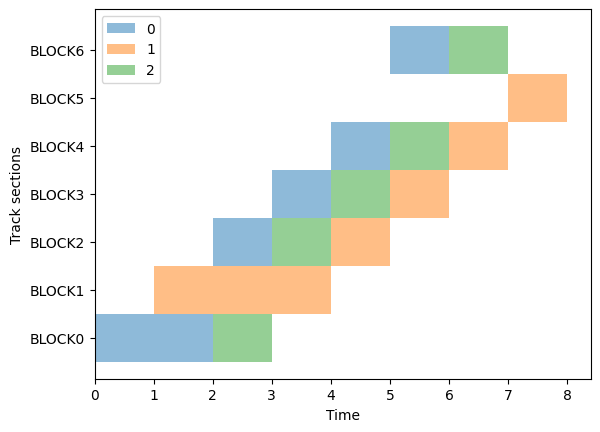

In [253]:
m4=m2.shift_train_after(train2, train3, 'BLOCK2')
m4.plot()
m4.total_delay_at_stations(schedule, ['BLOCK5','BLOCK6'])

In [254]:
%time
m.first_in(0,1,'BLOCK2')
schedule.first_in(0, 1, 'BLOCK2')

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.58 µs


0

# Deux trains, le 2e est plus lent

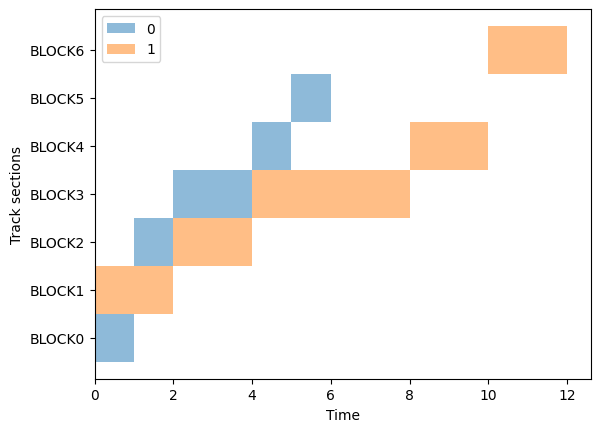

In [255]:
schedule2 = Schedule(6,2)


schedule2.df.at[0, 0] =  [0, 1]
schedule2.df.at[2, 0] =  [1, 2]
schedule2.df.at[3, 0] =  [2, 4]
schedule2.df.at[4, 0] =  [4, 5]
schedule2.df.at[5, 0] =  [5, 6]

schedule2.df.at[1, 1] =  [0, 2]
schedule2.df.at[2, 1] =  [2, 4]
schedule2.df.at[3, 1] =  [4, 8]
schedule2.df.at[4, 1] =  [8, 10]
schedule2.df.at[6, 1] =  [10, 12]

schedule2._df.index = 'BLOCK' + schedule2._df.index.astype(str)
schedule2.plot()
schedule2.draw_graph()

<Axes: xlabel='Time', ylabel='Track sections'>

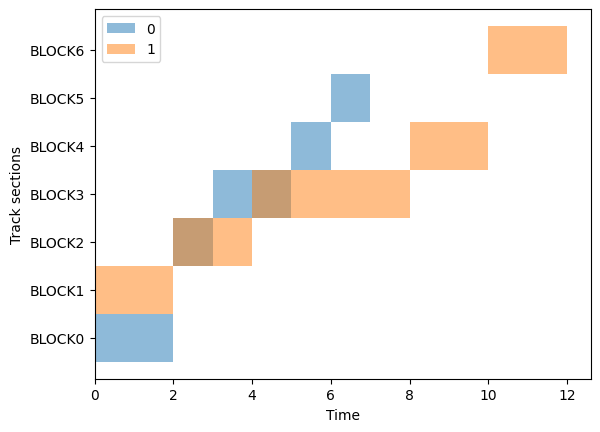

In [256]:
s1 = schedule2.add_delay(0,'BLOCK0',1)
s1.plot()


2.0

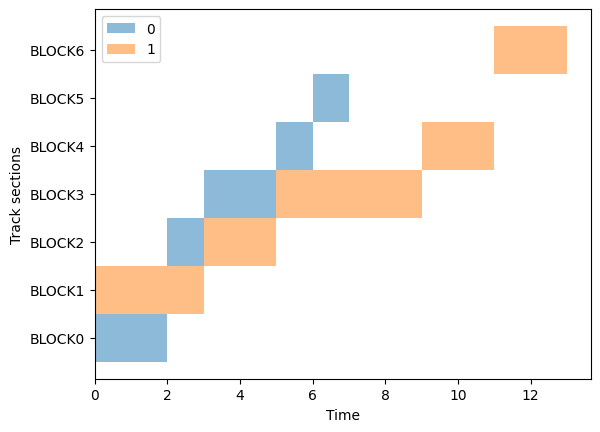

In [257]:
s2 = s1.shift_train_after(1,0,'BLOCK2')
s2.plot()
s2.total_delay_at_stations(schedule2, ['BLOCK5','BLOCK6'])

6.0

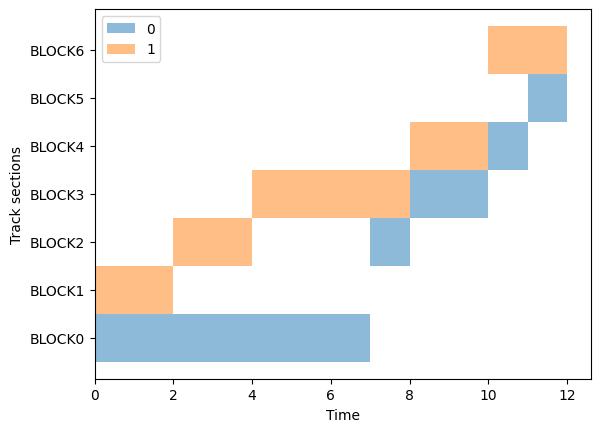

In [258]:
s3 = s1.shift_train_after(0,1,'BLOCK2')
s3.plot()
s3.total_delay_at_stations(schedule2, ['BLOCK5','BLOCK6'])

In [259]:
s2.delays(schedule2).max().loc[0]

1.0

In [260]:
s2.train_delay(0, schedule2)

1.0